# HSV Color Space, Balloons

## import resources and display image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
%matplotlib inline

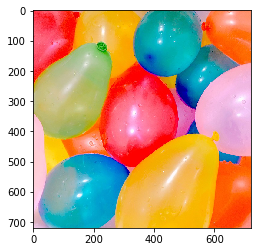

In [6]:
image = cv2.imread('images/water_ballons.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Plot color channels

* Each pixel in image has x and y values for its position and has RGB value for its color
* following, we isolate each color channles and display them

In [9]:
# RGB channels
r = image_copy[:,:,0]
g = image_copy[:,:,1]
b = image_copy[:,:,2]

** Show the three channels represented in grayscale intensity **

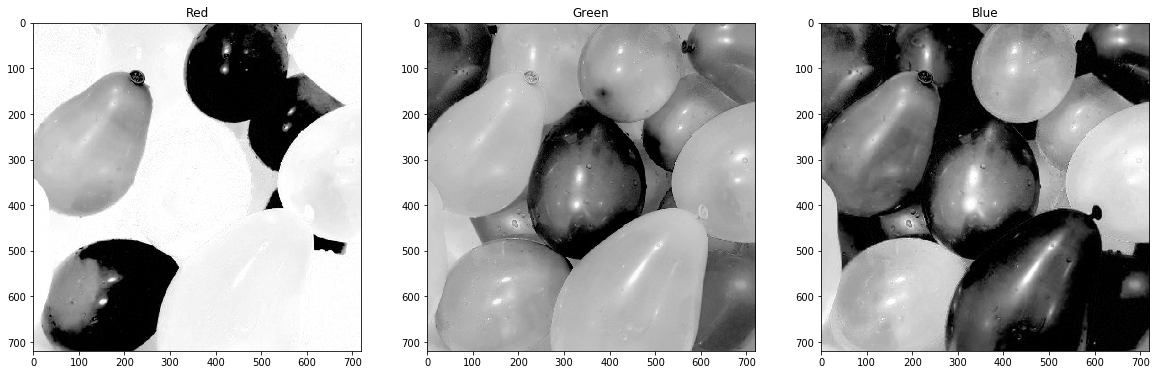

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20, 10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')
           
ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

The brighter pixels indicate higher values of red, green, or blue respectively

## Compare RGB and HSV

** Convert RGB to HSV **

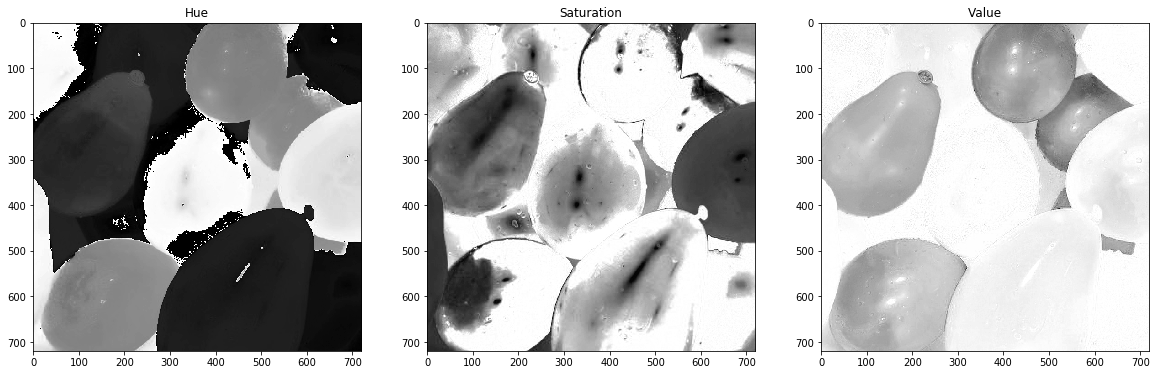

In [16]:
hsv = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20, 10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')
           
ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

**Define pink and bue selection thresholds**

In [17]:
# Define color selection criteria in RGB values

# Here define the pink color range by using RGB color selector
lower_pink = np.array([180, 0, 100])
upper_pink = np.array([255, 255, 230])

In [29]:
# Define color selection criteria in HSV values

# Here define the pink color range by using HSV color selector
# Note we are allowing any value for the saturation and value channels, 0-255
lower_hue = np.array([145, 0, 0])
upper_hue = np.array([195, 255, 255])

**Mask the image**

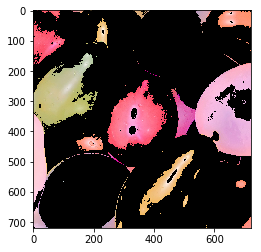

In [30]:
# RGB mask

mask_rgb = cv2.inRange(image_copy, lower_pink, upper_pink)

masked_image = np.copy(image_copy)

masked_image[mask_rgb==0] = [0,0,0]

plt.imshow(masked_image)

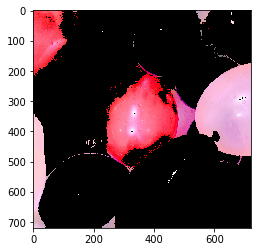

In [31]:
# HSV mask

mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# plt.imshow(mask_hsv)

masked_image = np.copy(image_copy)

masked_image[mask_hsv==0] = [0,0,0]

plt.imshow(masked_image)

> We can see that HSV space is actually more valuable in selecting an area under varying light conditions